# Predicting Tesla(TSLA) stock price using Facebook Prophet

In [ ]:
!pip install pystan~=2.14
!pip install fbprophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.3 MB 131 kB/s 
  Attempting uninstall: pystan
    Found existing installation: pystan 3.3.0
    Uninstalling pystan-3.3.0:
      Successfully uninstalled pystan-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 64 kB 1.1 MB/s 
  Created wheel for fbprophet: filename=fbprophet-0.7.1-py3-none-any.whl size=6638598 sha256=4c1f18c28f8ed35b61568e8d8f528f2738b2c516d7b33928e9b135ec4b112a84
  Stored in directory: /root/.cache/pip/wheels/cd/a1/12/db63ff624de492fe6cccf676091a0860fdde2ffde4bc3280e2
Successfully built fbprophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 1.0.7
    Uninstalling cmdstanpy-1.0.7:
      Successfully uninstalled cmdstanpy-1.0.7
ERROR: pip's dependency resolver does not currently take into account all the 

In [ ]:
#importing required libraries
import pandas as pd
import numpy as np
import plotly.express as px
from fbprophet import Prophet

In [ ]:
#Initialize Plotly
import plotly.io as pio
pio.renderers.default = 'colab'

## Importing the data to our dataframe

In [ ]:
data = pd.read_csv("SHIB-USD.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-09-23,0.000007,0.000008,0.000007,0.000008,0.000008,370820478
1,2021-09-24,0.000008,0.000008,0.000007,0.000007,0.000007,456964069
2,2021-09-25,0.000007,0.000008,0.000007,0.000007,0.000007,227277343
3,2021-09-26,0.000007,0.000007,0.000007,0.000007,0.000007,257921523
4,2021-09-27,0.000007,0.000007,0.000007,0.000007,0.000007,207040951


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       366 non-null    float64
 2   High       366 non-null    float64
 3   Low        366 non-null    float64
 4   Close      366 non-null    float64
 5   Adj Close  366 non-null    float64
 6   Volume     366 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 20.1+ KB


In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,366.000000,366.000000,366.000000,366.000000,366.000000,3.660000e+02
mean,0.000023,0.000025,0.000022,0.000023,0.000023,1.778888e+09
std,0.000013,0.000015,0.000012,0.000013,0.000013,3.501527e+09
min,0.000007,0.000007,0.000007,0.000007,0.000007,1.753632e+08
25%,0.000012,0.000012,0.000012,0.000012,0.000012,4.296441e+08
50%,0.000022,0.000023,0.000022,0.000022,0.000022,7.458387e+08
75%,0.000029,0.000031,0.000028,0.000029,0.000029,1.648111e+09
max,0.000079,0.000088,0.000067,0.000080,0.000080,3.905385e+10


## Visualizing the data

In [ ]:
px.area(data, x= "Date", y ="Close")

In [ ]:
px.area(data, x= "Date", y ="Volume")

In [ ]:
px.box(data, y = "Close")

In [ ]:
df = data[['Date','Close']].copy()
df.head()

,Date,Close
0,2021-09-23,0.000008
1,2021-09-24,0.000007
2,2021-09-25,0.000007
3,2021-09-26,0.000007
4,2021-09-27,0.000007


Prophet only takes ds and y as column names so we will rename these

In [ ]:
df.rename(columns={'Date': 'ds', 'Close':'y'}, inplace = True)
df.head()

,ds,y
0,2021-09-23,0.000008
1,2021-09-24,0.000007
2,2021-09-25,0.000007
3,2021-09-26,0.000007
4,2021-09-27,0.000007


creating prophet model

In [ ]:
model = Prophet()
model.fit(df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


forecasting

In [ ]:
future = model.make_future_dataframe(periods= 30) #adds 30 more days to the orignal df, this is what we will predict
forecast = model.predict(future)


In [ ]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-09-23,0.000014,0.000006,0.000022,0.000014,0.000014,-3.013555e-07,-3.013555e-07,-3.013555e-07,-3.013555e-07,-3.013555e-07,-3.013555e-07,0.0,0.0,0.0,0.000014
1,2021-09-24,0.000015,0.000008,0.000023,0.000015,0.000015,-2.113122e-07,-2.113122e-07,-2.113122e-07,-2.113122e-07,-2.113122e-07,-2.113122e-07,0.0,0.0,0.0,0.000015
2,2021-09-25,0.000016,0.000008,0.000023,0.000016,0.000016,-2.982053e-07,-2.982053e-07,-2.982053e-07,-2.982053e-07,-2.982053e-07,-2.982053e-07,0.0,0.0,0.0,0.000016
3,2021-09-26,0.000017,0.000008,0.000024,0.000017,0.000017,-9.691810e-08,-9.691810e-08,-9.691810e-08,-9.691810e-08,-9.691810e-08,-9.691810e-08,0.0,0.0,0.0,0.000016
4,2021-09-27,0.000017,0.000010,0.000025,0.000017,0.000017,8.535777e-08,8.535777e-08,8.535777e-08,8.535777e-08,8.535777e-08,8.535777e-08,0.0,0.0,0.0,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,2022-10-19,0.000011,0.000003,0.000019,0.000009,0.000012,5.936384e-07,5.936384e-07,5.936384e-07,5.936384e-07,5.936384e-07,5.936384e-07,0.0,0.0,0.0,0.000011
392,2022-10-20,0.000011,0.000003,0.000019,0.000009,0.000012,-3.013555e-07,-3.013555e-07,-3.013555e-07,-3.013555e-07,-3.013555e-07,-3.013555e-07,0.0,0.0,0.0,0.000010
393,2022-10-21,0.000011,0.000002,0.000019,0.000009,0.000012,-2.113122e-07,-2.113122e-07,-2.113122e-07,-2.113122e-07,-2.113122e-07,-2.113122e-07,0.0,0.0,0.0,0.000010
394,2022-10-22,0.000011,0.000002,0.000019,0.000009,0.000012,-2.982053e-07,-2.982053e-07,-2.982053e-07,-2.982053e-07,-2.982053e-07,-2.982053e-07,0.0,0.0,0.0,0.000010


In [ ]:
px.line(forecast, x='ds',y='yhat')

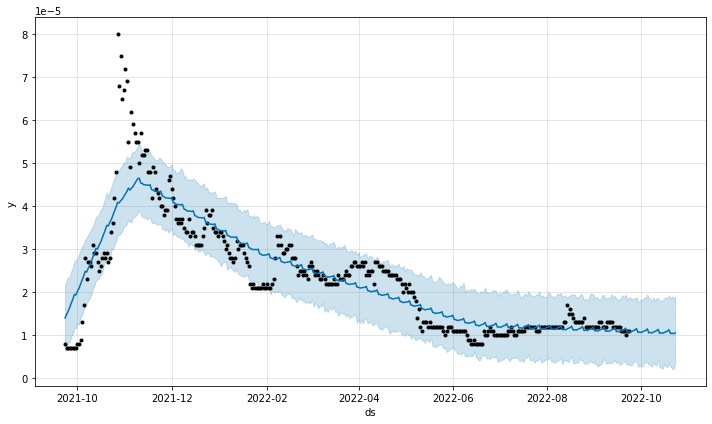

In [ ]:
figure1 = model.plot(forecast, xlabel='ds', ylabel='y ')

black dots are the actual price, while the blue line is the predicted price

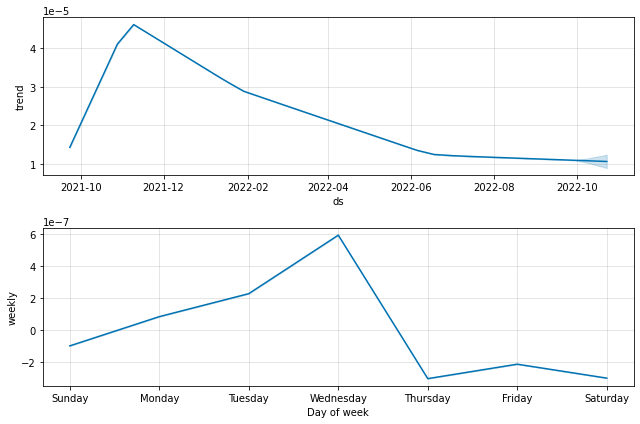

In [ ]:
figure2 = model.plot_components(forecast)

downloading

In [ ]:
from google.colab import files
forecast.to_csv('forecast.csv')
files.download('forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>